In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_image_from_url(img_url, image_size):
  """Get the image from url. The image return has shape [1, height, width, num_channels]."""
  response = requests.get(img_url, headers={'User-agent': 'Colab Sample (https://tensorflow.org)'})
  image = Image.open(BytesIO(response.content))
  image = np.array(image)
  # reshape image
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]]) 
  # Normalize by convert to float between [0,1]
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32) 
  image_padded = tf.image.resize_with_pad(image, image_size, image_size)
  return image_padded, image


def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

Images will be converted to 330x330


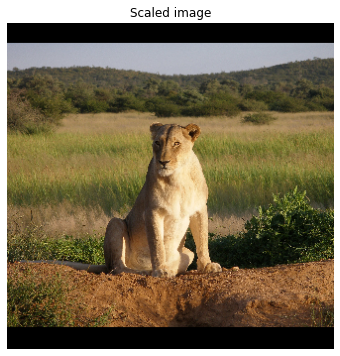

In [3]:
image_size = 330
print(f"Images will be converted to {image_size}x{image_size}")
img_url =  "https://upload.wikimedia.org/wikipedia/commons/c/c6/Okonjima_Lioness.jpg"
image, original_image = load_image_from_url(img_url, image_size) 
show_image(image, 'Scaled image')

In [4]:
labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


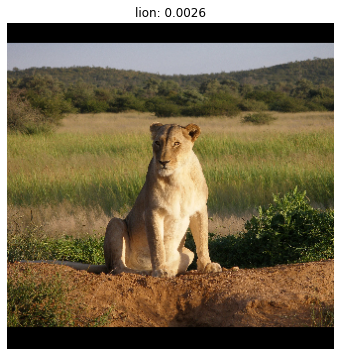

In [5]:
# Run model on image
classifier = hub.load("https://tfhub.dev/tensorflow/efficientnet/b2/classification/1")
probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()

show_image(image, f'{classes[top_5[0]+1]}: {probabilities[0][top_5][0]:.4f}')

In [8]:
'lion' in classes

True